# Algorithm run animation creator


In [1]:
# If pydistsim is not installed and the script is run from docs/notebooks directory
# import sys
# sys.path.append("../../")

%matplotlib notebook
from pydistsim.network import NetworkGenerator
from pydistsim.demo_algorithms.santoro2007.yoyo import YoYo
from pydistsim.simulation import Simulation
from pydistsim.network.behavior import ExampleProperties
from pydistsim.gui import drawing as draw

### As always, let's start with network and simulation object creation


In [2]:
net = NetworkGenerator.generate_hypercube_network(8)
net.behavioral_properties = ExampleProperties.RandomDelayCommunication
sim = Simulation(net, (YoYo,))

### Create a frame with the simulation current state

In the following cell, we show how to create a frame with the current state of the simulation.


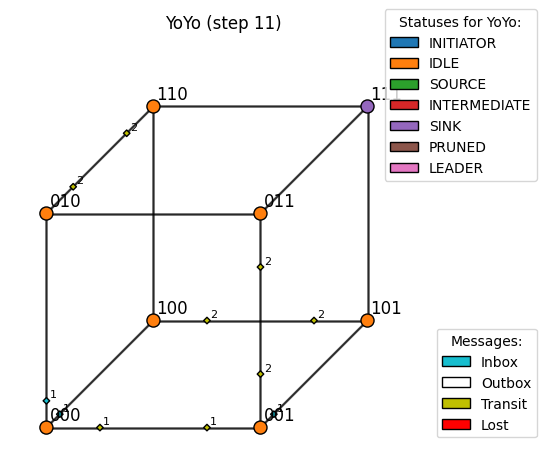

In [3]:
sim.run(10)
fig = draw.draw_current_state(sim)

fig

### Keep going and watch the simulation as it runs


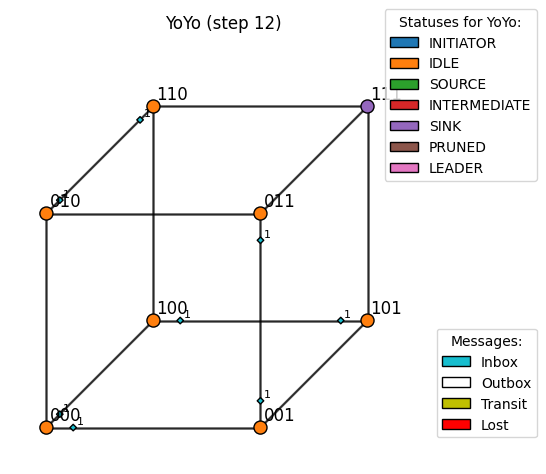

In [4]:
sim.run(1)
fig = draw.draw_current_state(sim)

fig

## Video creation

In the following cell, we show how to create a video with the whole simulation process. You should be able to watch
the video from the notebook.


In [5]:
from IPython.display import HTML

sim.reset()
anim = draw.create_animation(sim)
video = anim.to_html5_video()

HTML(video)

To save the video, you can use the `save` method of the `Animation` class.

This will raise an exception if FFMpeg is not installed.

Learn more about animation writers at:

https://matplotlib.org/stable/api/animation_api.html#writer-classes


In [6]:
from matplotlib.animation import FFMpegFileWriter

writer = FFMpegFileWriter()
sim.reset()
anim = draw.create_animation(sim)

anim.save("flood.mp4", writer=writer)